In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [2]:
from get_clean_data_DTR import get_data, clean_data, get_feats, get_target, partition_feats_by_ptp_cnt
from plot_results_and_residuals import plot_results, plot_residuals, plot_student_residuals

<h3>Variable List: </h3>
<ul><li>model_dict : Dictionary of linear regression models fit with 2014 data divided by plan participant count
<li>partitioned_dict_of_df_XX : Dictionary of tuples:<br>X (features matrix): Pandas dataframes of 20XX plan features divided by plan participant count, <br>y (target series): Pandas Series of 20XX+1 actual funding target 
<li>predict_dict_XX : Dictionary of predicted 20XX+1 funding targets (predicted off 20XX features)
<li>student_resids_XX : Dictionary of studentized residuals

<h1>Get training data: 2014 Schedule SB, H and Form 5500 filing fields </h1>
<h3>In dictionary with keys = participant count range (partitions)</h3>

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>
<h3>Interaction Features:</h3>
    <ul><li>Effective interst rate x prior year funding target
        <li>Effective interst rate x prior year target normal cost (expected growth in funding target)
        <li>Effective interst rate x prior year benefits paid (1/2 year)
    </ul>

In [3]:
partitioned_dict_of_df_14 = partition_feats_by_ptp_cnt(2014)

In [ ]:
partitioned_dict_of_df_14_more = partition_more_feats_by_ptp_cnt(2014)

In [4]:
partition_list = [(0,300),(300,500),(500,800),(800,1500),(1500,2500),(2500,5000),(5000,10000),(10000,50000),(50000,100000),(100000,500000)]

<b>Number of plans in each partition of data</b>:

In [5]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_14[i][0]))

(0, 300) : 1500
(300, 500) : 704
(500, 800) : 593
(800, 1500) : 712
(1500, 2500) : 482
(2500, 5000) : 504
(5000, 10000) : 369
(10000, 50000) : 311
(50000, 100000) : 51
(100000, 500000) : 28


In [ ]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_14_more[i][0]))

<h1>Create dictionary of linear models (OLS) fitted on 2014 partitioned data</h1>

In [6]:
model_dict = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_14[i]
    model_dict[i] = DecisionTreeRegressor().fit(X, y)
    print(model_dict[i].score(X,y))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


<h1>Test on 2015 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [7]:
partitioned_dict_of_df_15 = partition_feats_by_ptp_cnt(2015)

In [ ]:
partitioned_dict_of_df_15_more = partition_more_feats_by_ptp_cnt(2015)

<b>Distribution of plan sizes</b>

In [8]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_15[i][0]))

(0, 300) : 1466
(300, 500) : 672
(500, 800) : 568
(800, 1500) : 675
(1500, 2500) : 460
(2500, 5000) : 488
(5000, 10000) : 348
(10000, 50000) : 306
(50000, 100000) : 50
(100000, 500000) : 28


In [9]:
predict_dict_15 = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_15[i]
    predict_dict_15[i] = model_dict[i].predict(X)

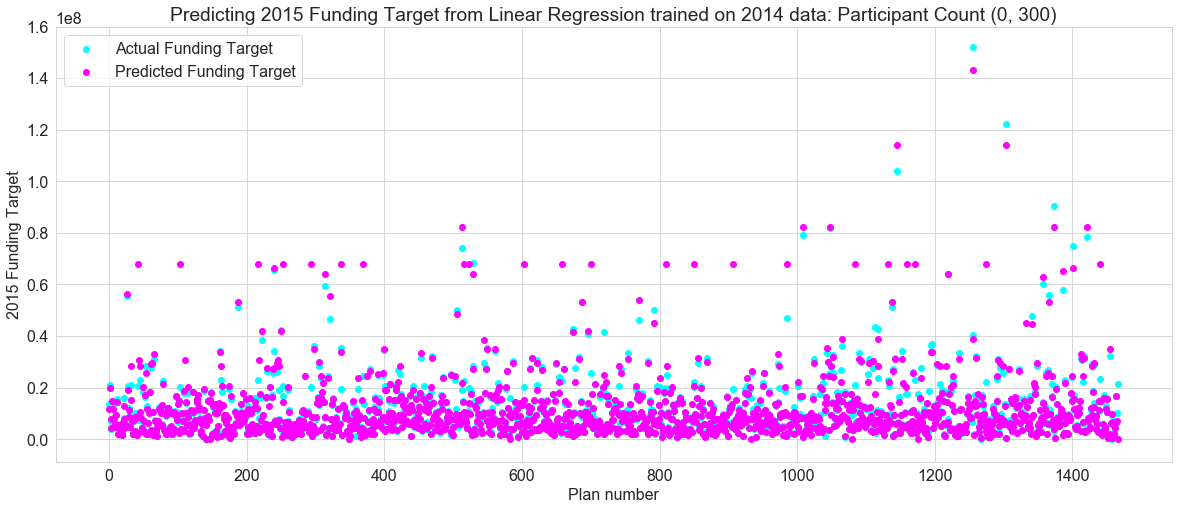

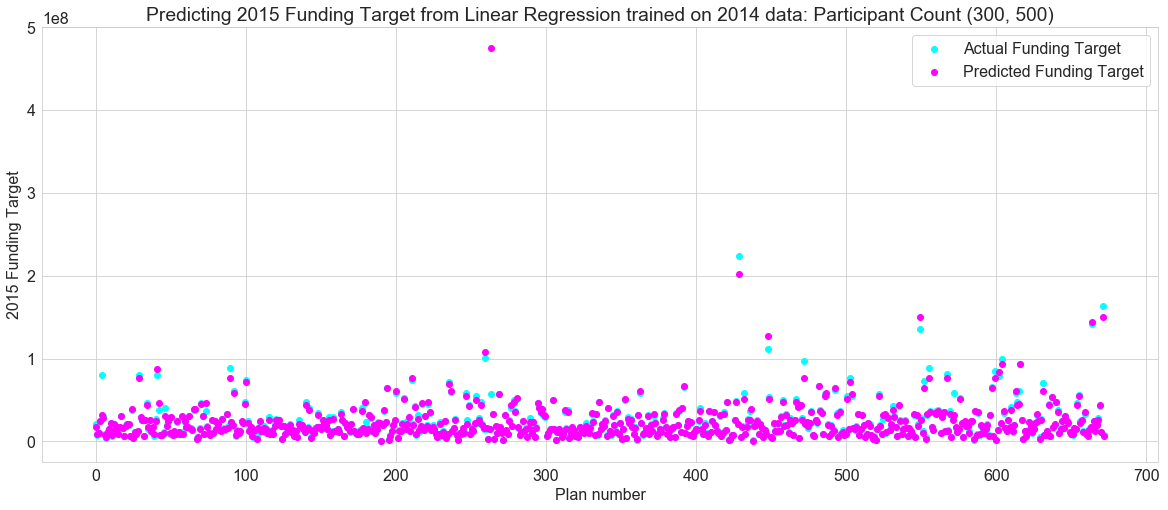

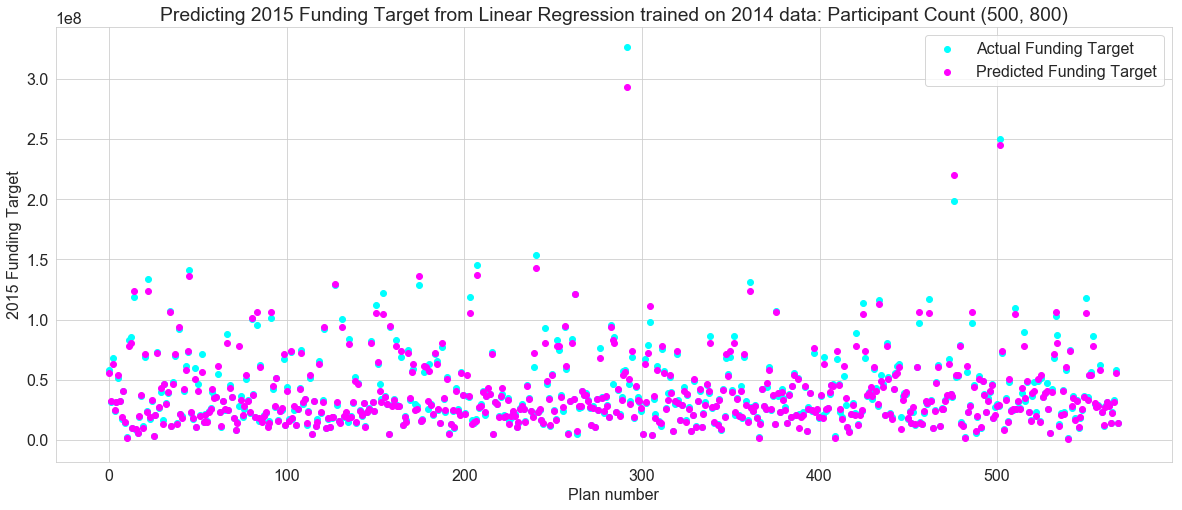

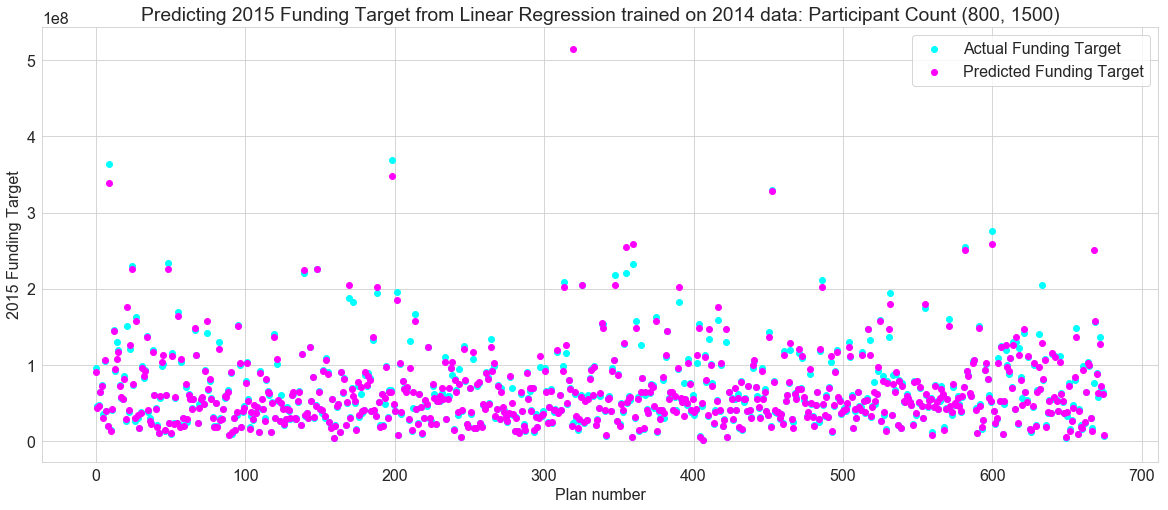

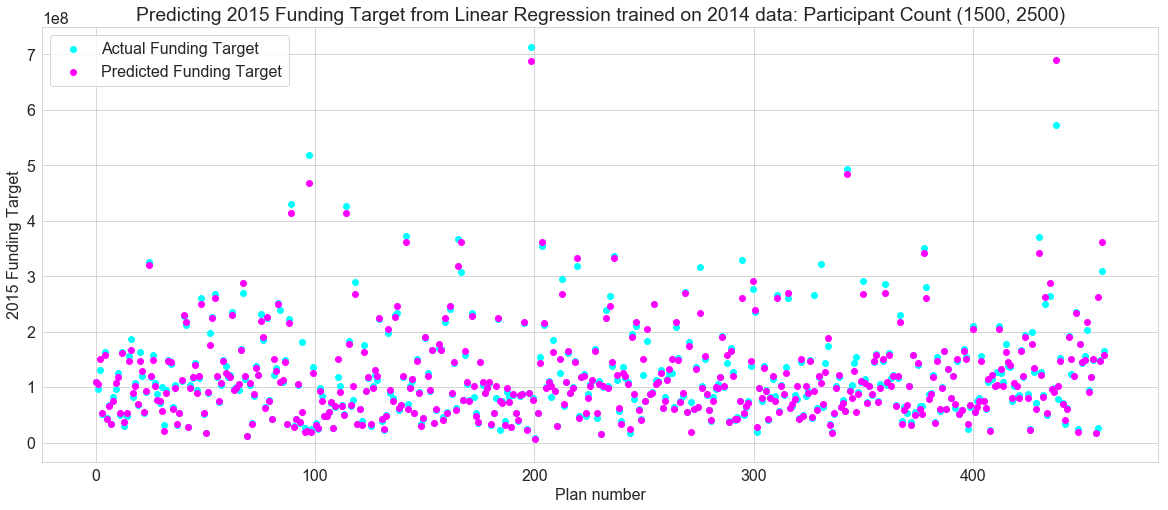

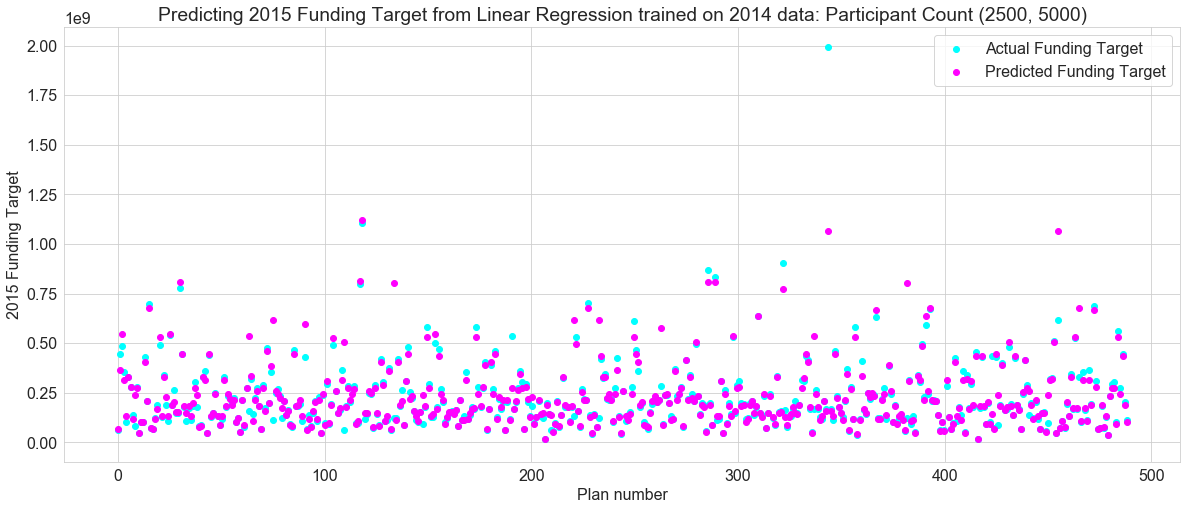

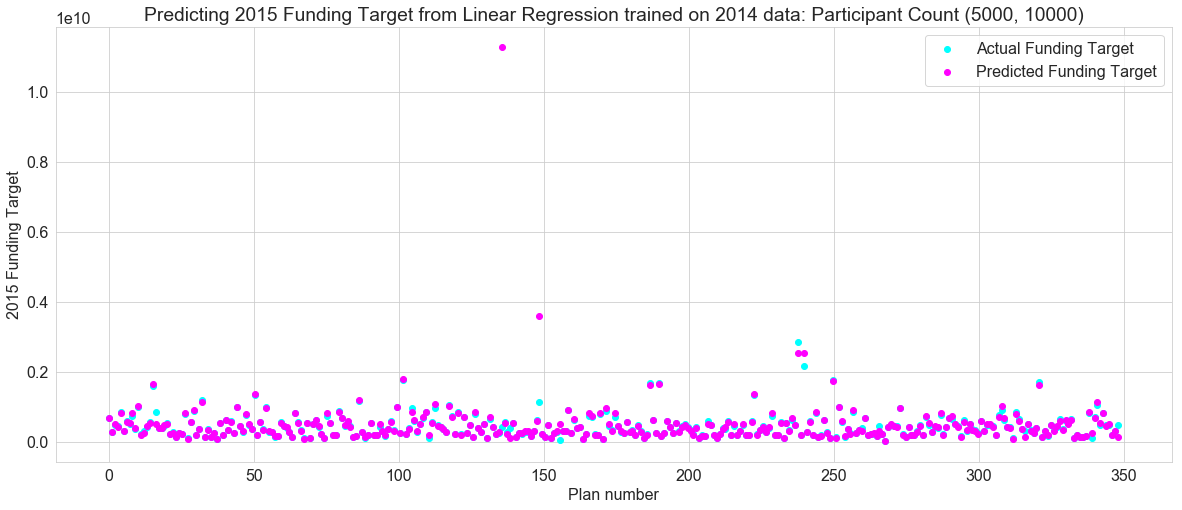

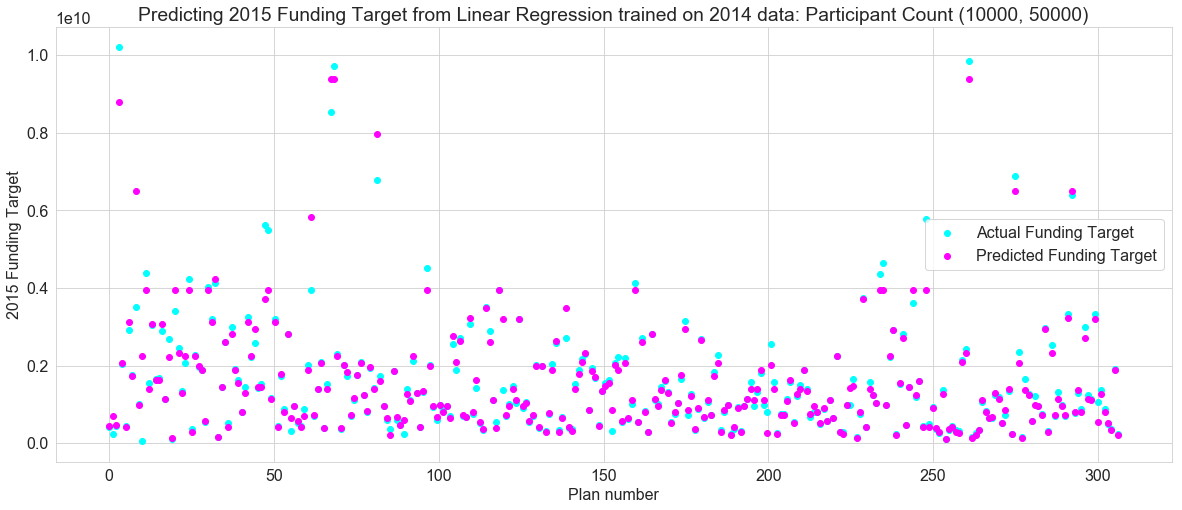

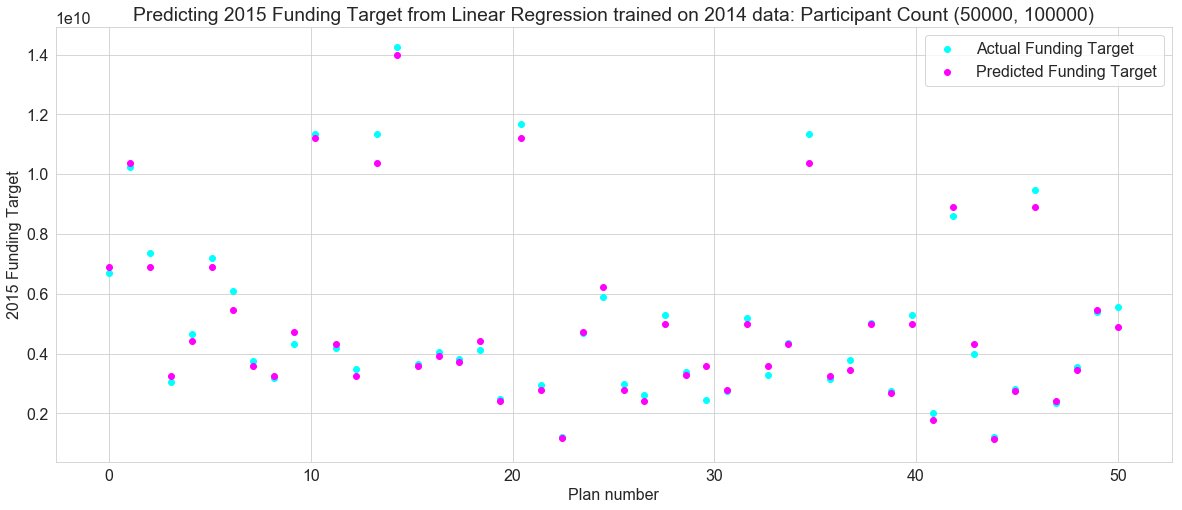

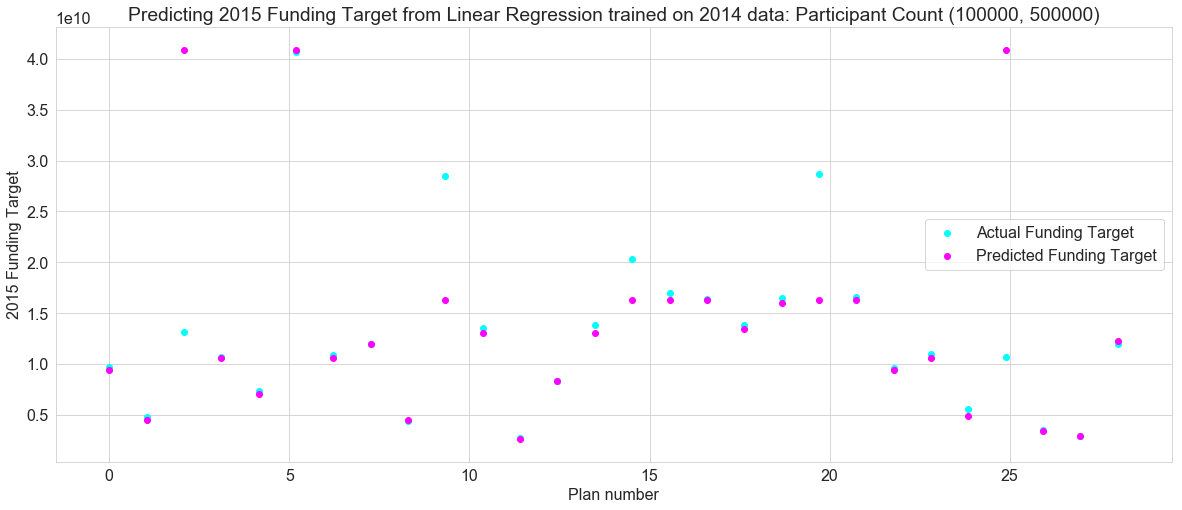

In [10]:
for i in partition_list:
    y_true = partitioned_dict_of_df_15[i][1]
    y_pred = predict_dict_15[i]
    plot_results(y_true, y_pred, i, 2015)

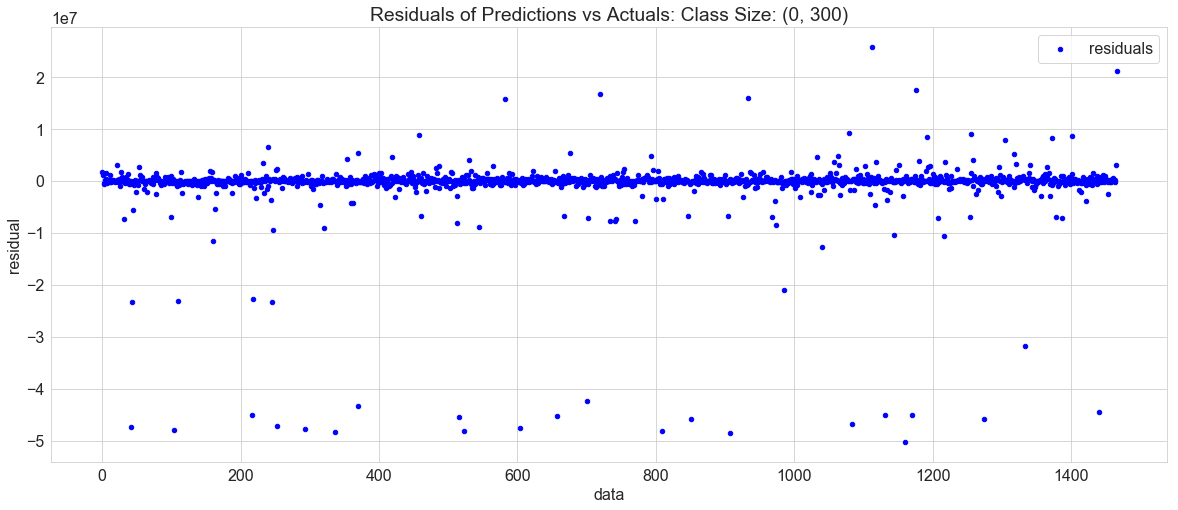

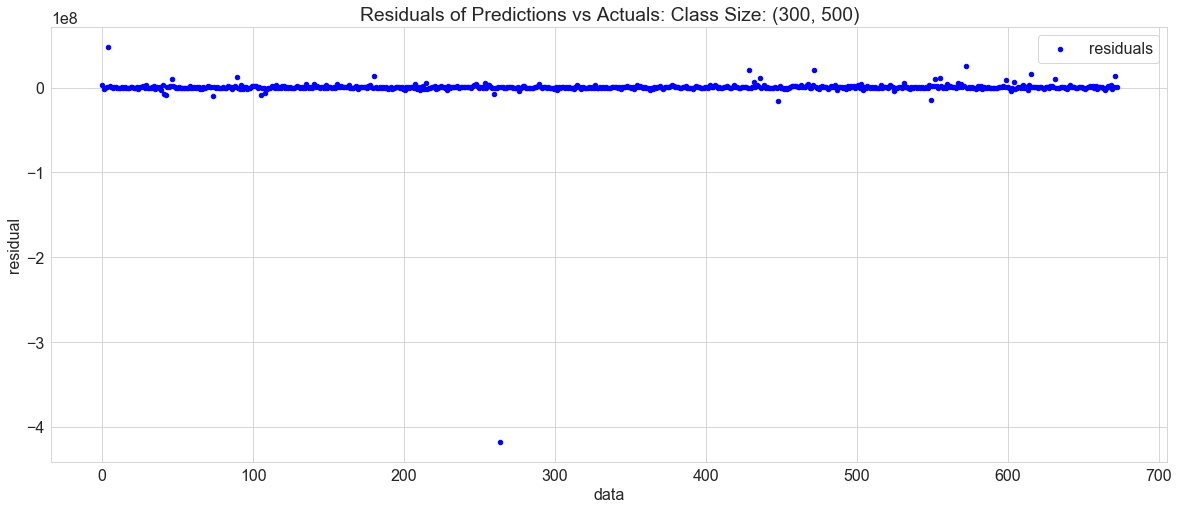

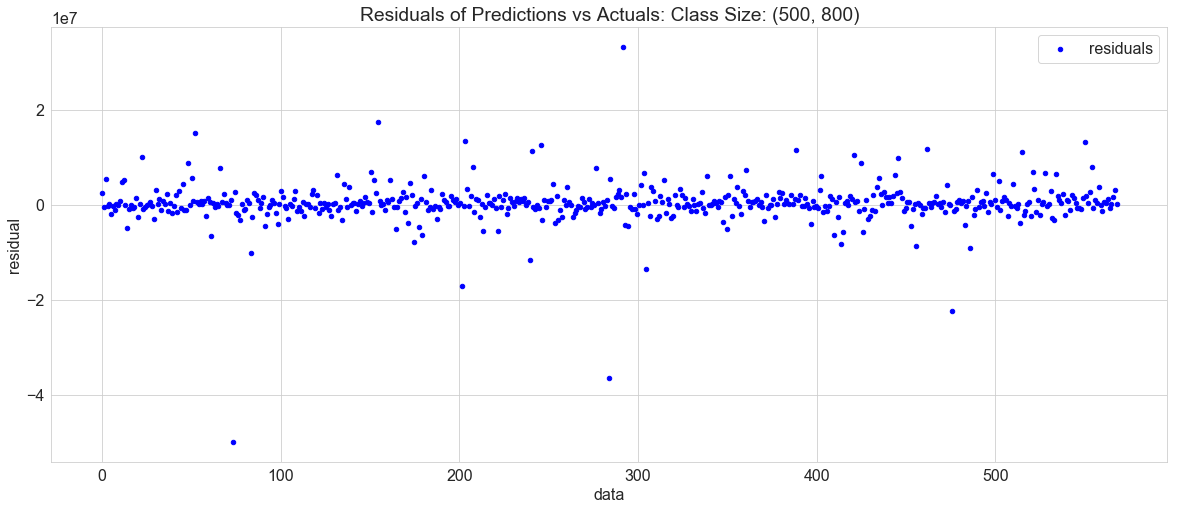

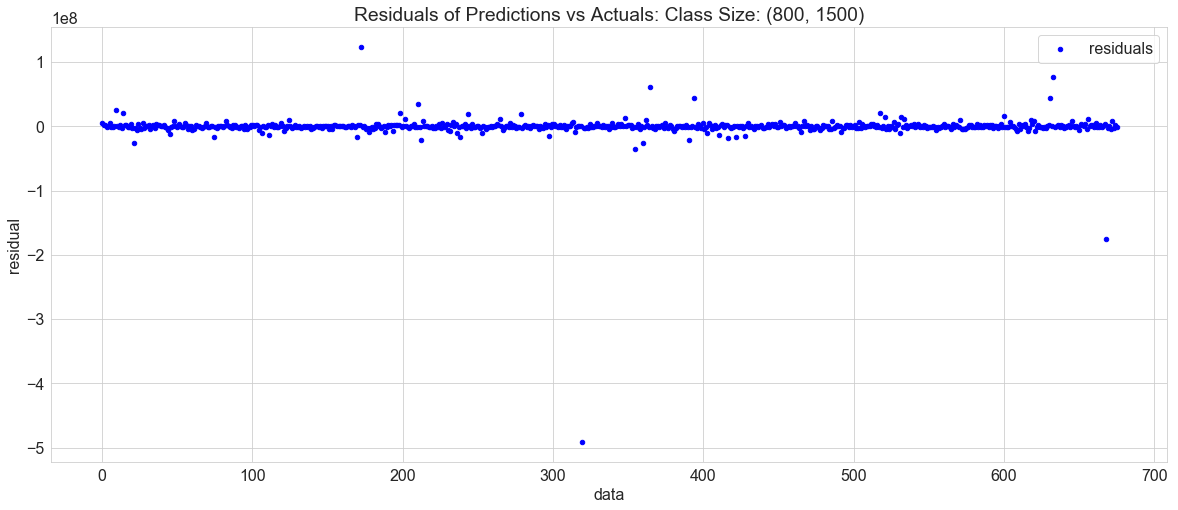

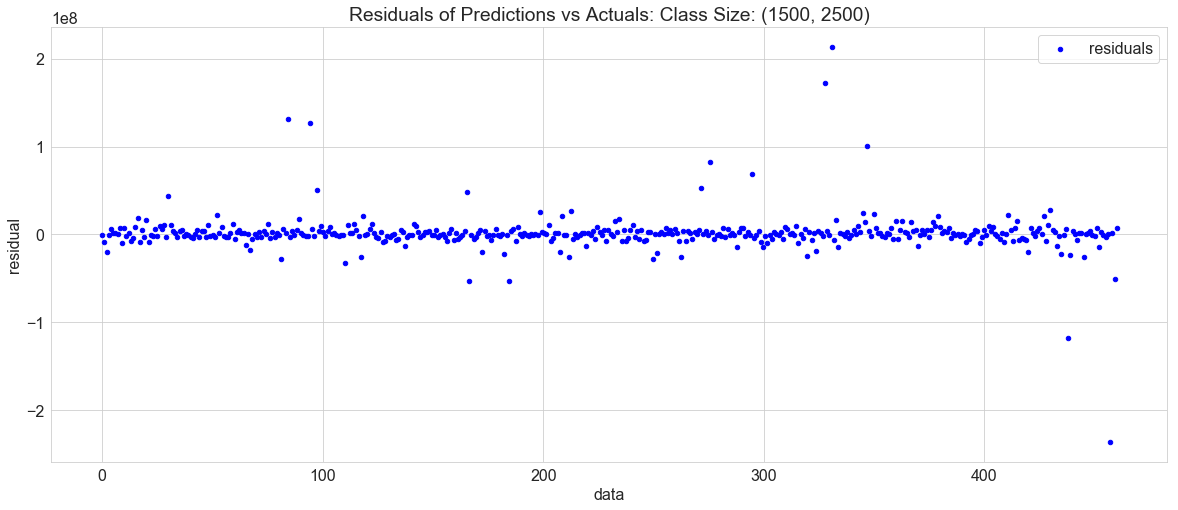

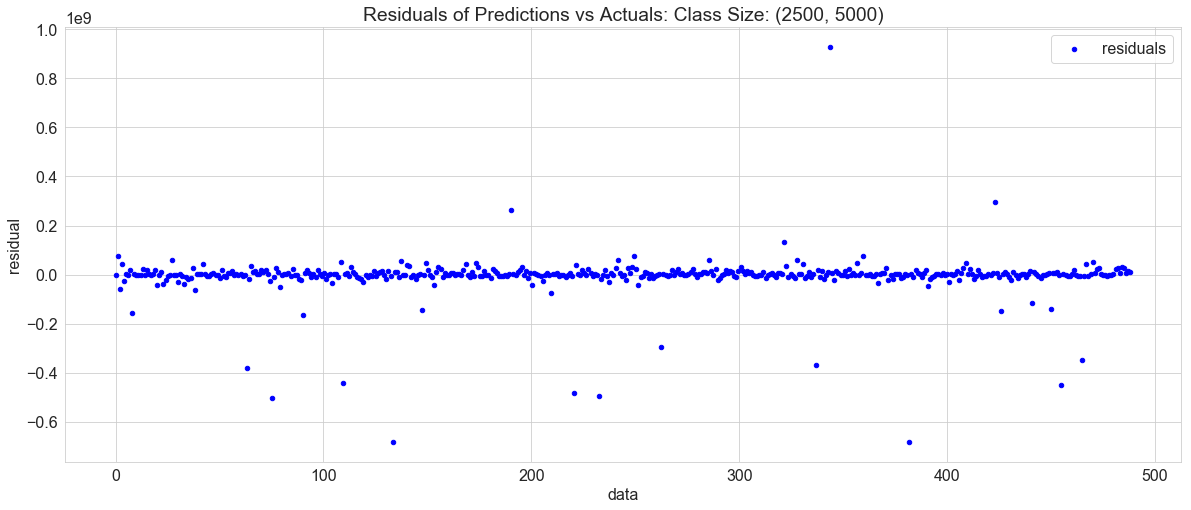

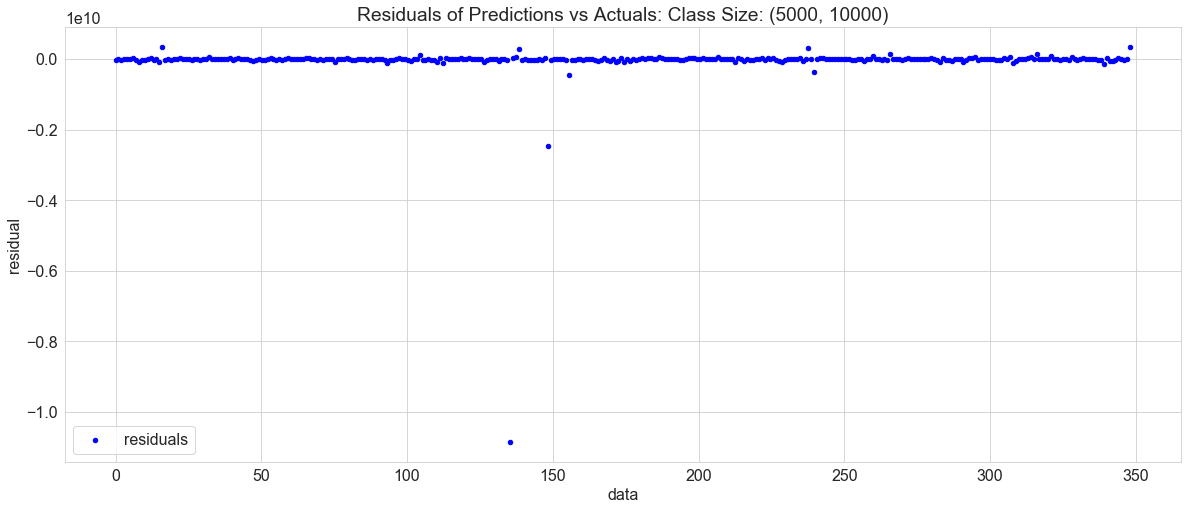

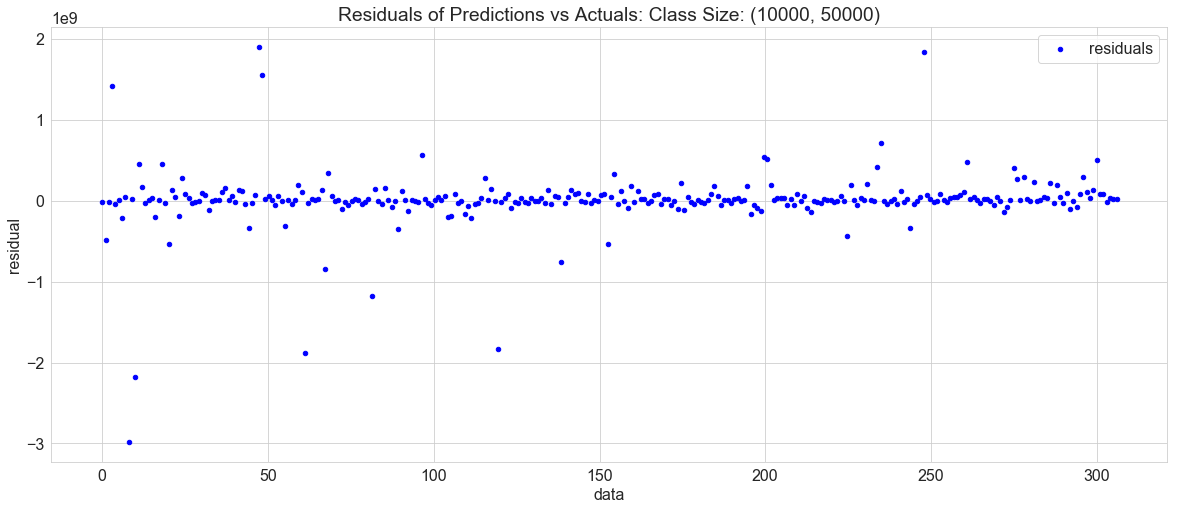

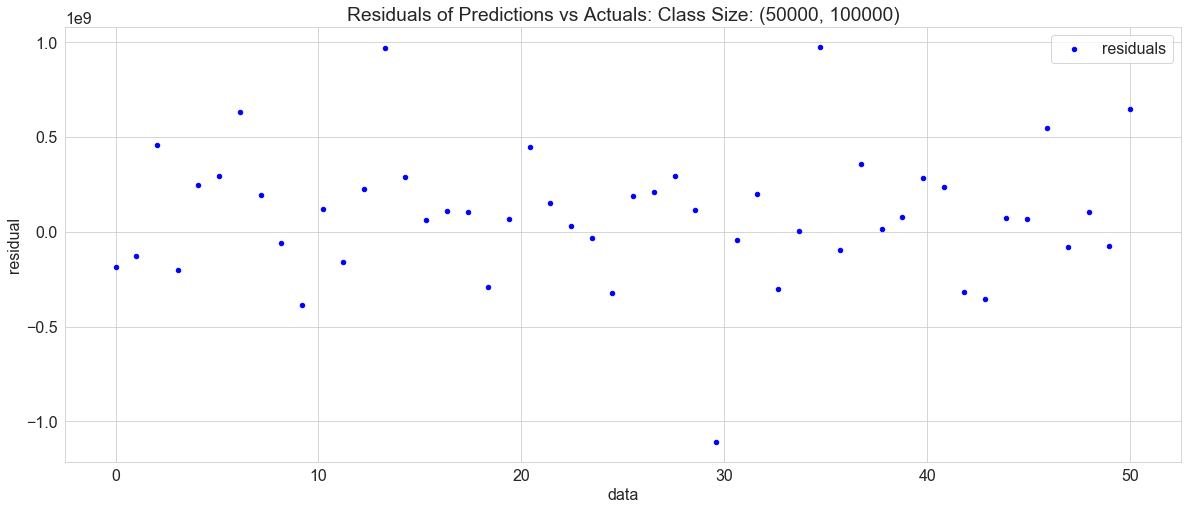

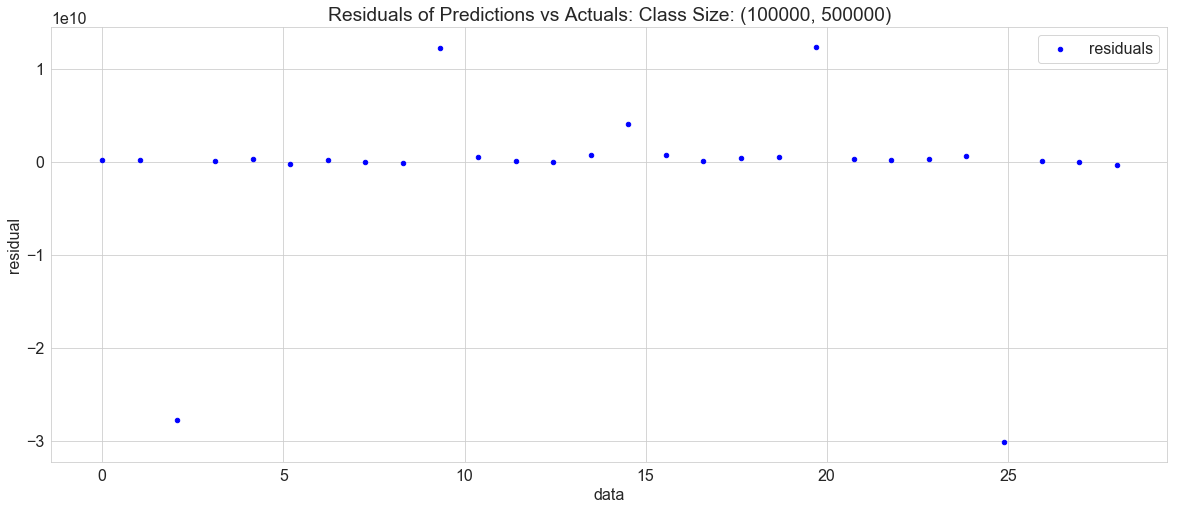

In [11]:
for i in partition_list:
    y_true = partitioned_dict_of_df_15[i][1]
    y_pred = predict_dict_15[i]
    plot_residuals(y_true, y_pred, i)

In [ ]:
len(predict_dict_15[(500,800)]), len(partitioned_dict_of_df_15_more[(500,800)][0])

In [ ]:
combined_15 = {}
for i in partition_list:
    combined_15[i] = pd.concat([partitioned_dict_of_df_15_more[i][0], pd.DataFrame(predict_dict_15[i]).rename(columns={0:'predicted_fndng_tgt_2016'})], 
                                axis=1, join='inner')

In [ ]:
for i in partition_list:
    combined_15[i] = pd.concat([combined_15[i], partitioned_dict_of_df_15_more[i][1]], 
                                axis=1, join='inner')

In [ ]:
combined_15[(1500,2500)]

In [ ]:
prelim_df = get_data(2015)

In [ ]:
df = clean_data(prelim_df, 2015)

In [ ]:
df

In [ ]:
len(combined_15[(1500,2500)]), len(partitioned_dict_of_df_15_more[(300,500)][0])

<h1>Test on 2016 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [12]:
partitioned_dict_of_df_16 = partition_feats_by_ptp_cnt(2016)

In [ ]:
partitioned_dict_of_df_16_more = partition_more_feats_by_ptp_cnt(2016)

In [15]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_16[i][0]))

(0, 300) : 221
(300, 500) : 81
(500, 800) : 49
(800, 1500) : 52
(1500, 2500) : 38
(2500, 5000) : 31
(5000, 10000) : 23
(10000, 50000) : 20
(50000, 100000) : 5
(100000, 500000) : 3


In [16]:
predict_dict_16 = {}
for i in partition_list[1:]:
    X, y = partitioned_dict_of_df_16[i]
    predict_dict_16[i] = model_dict[i].predict(X)

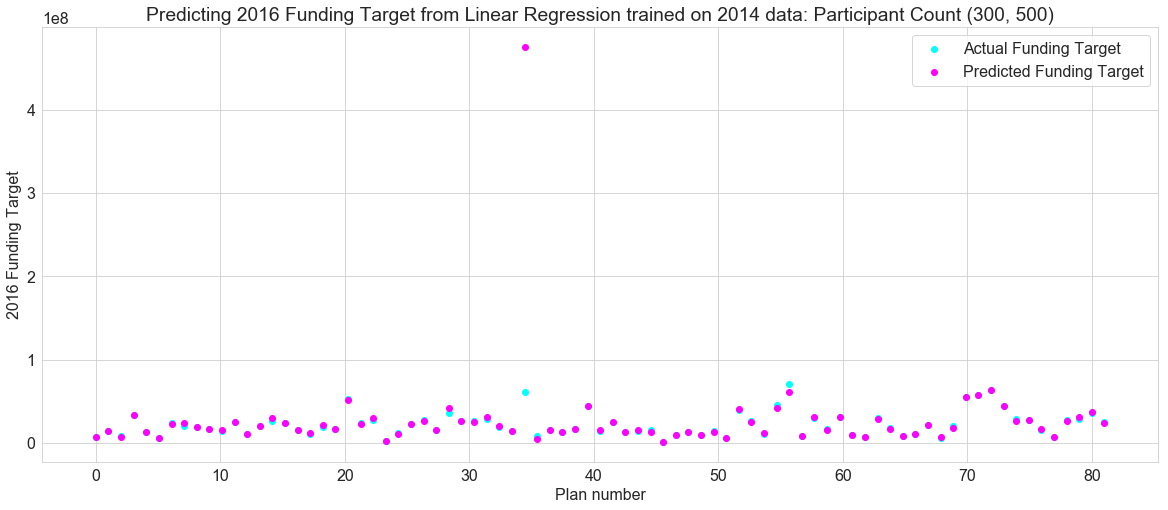

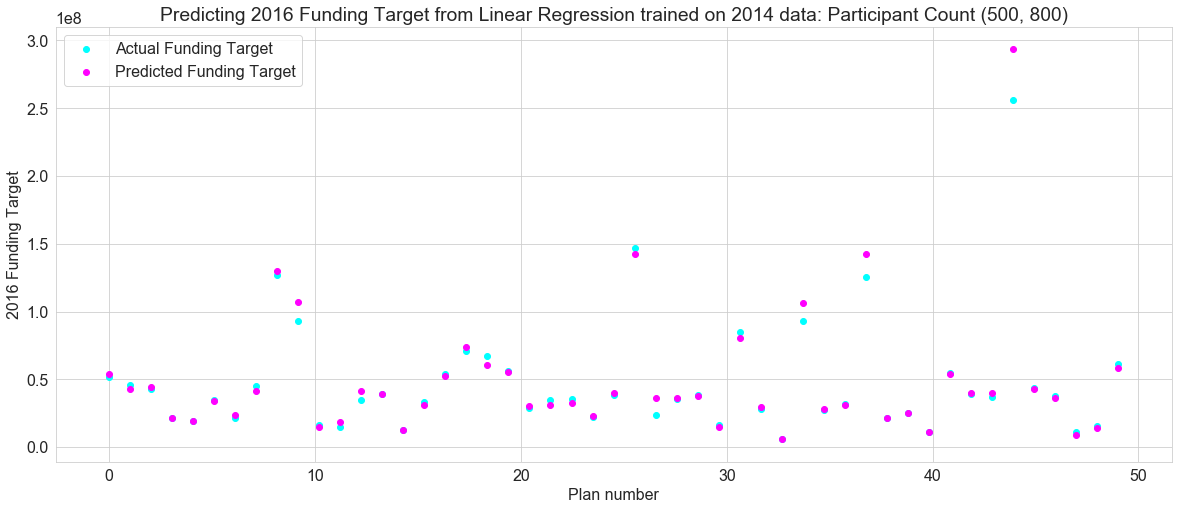

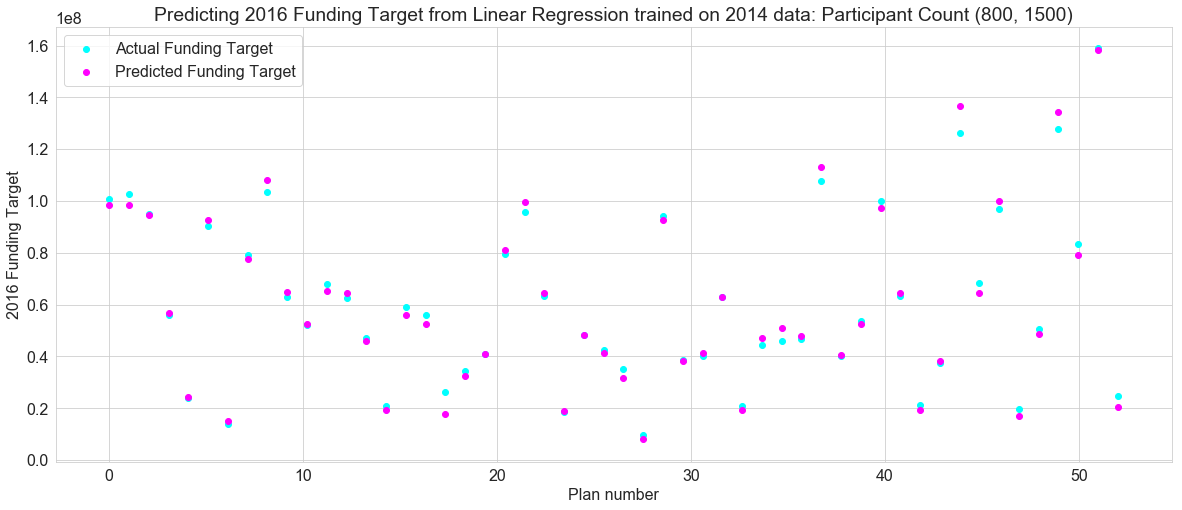

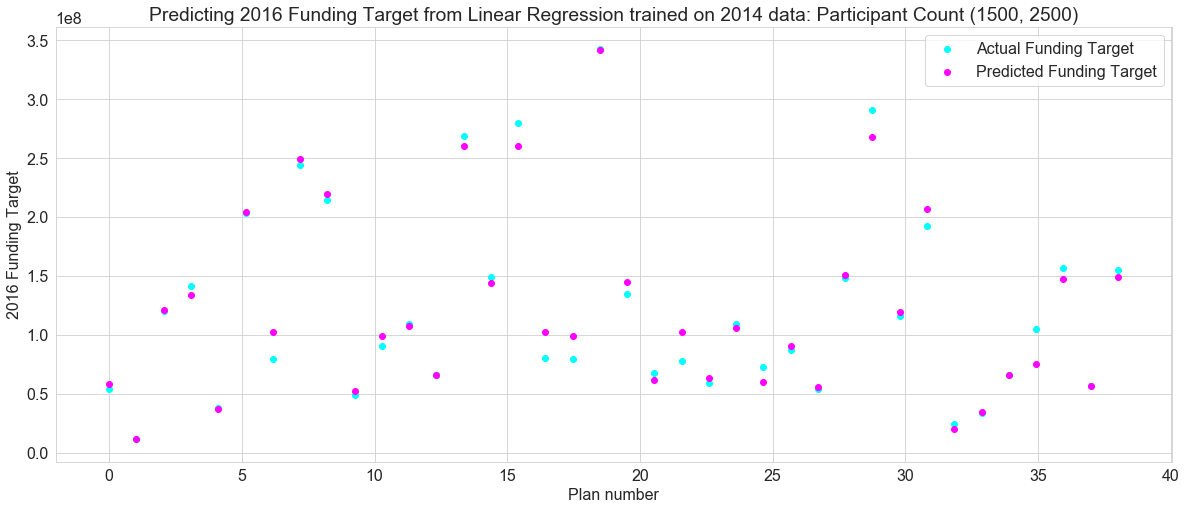

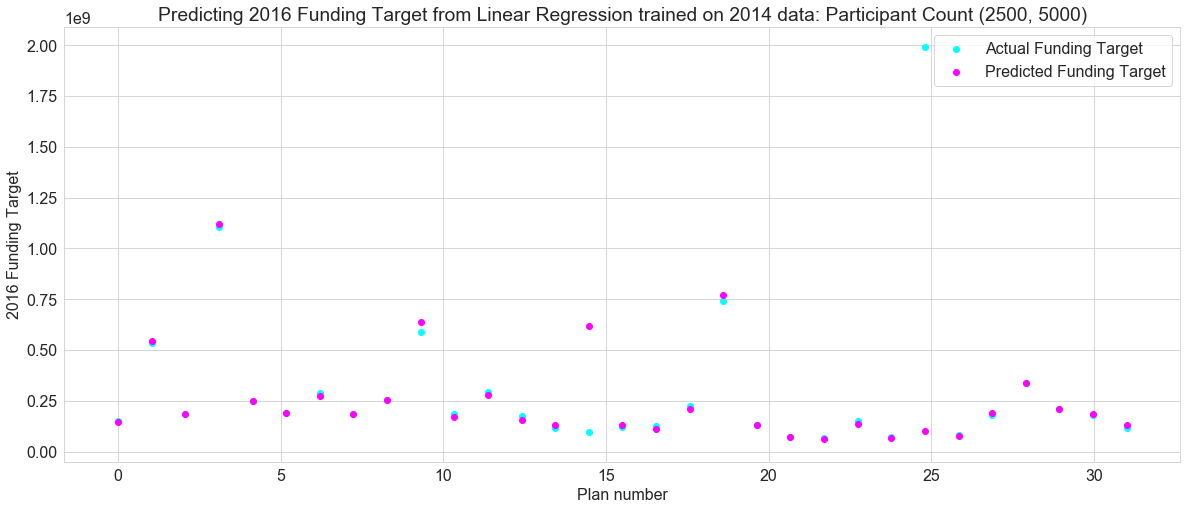

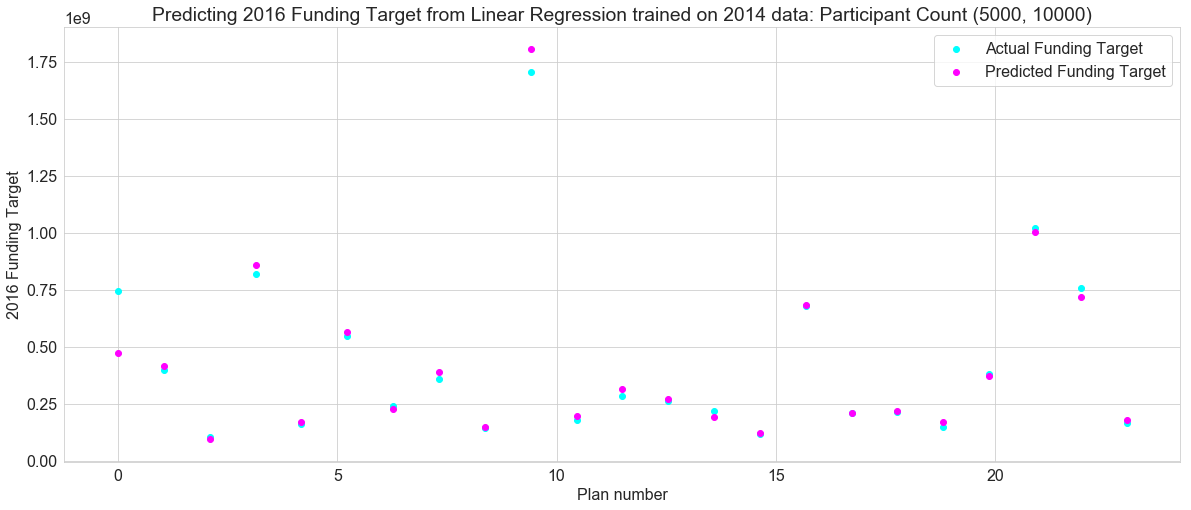

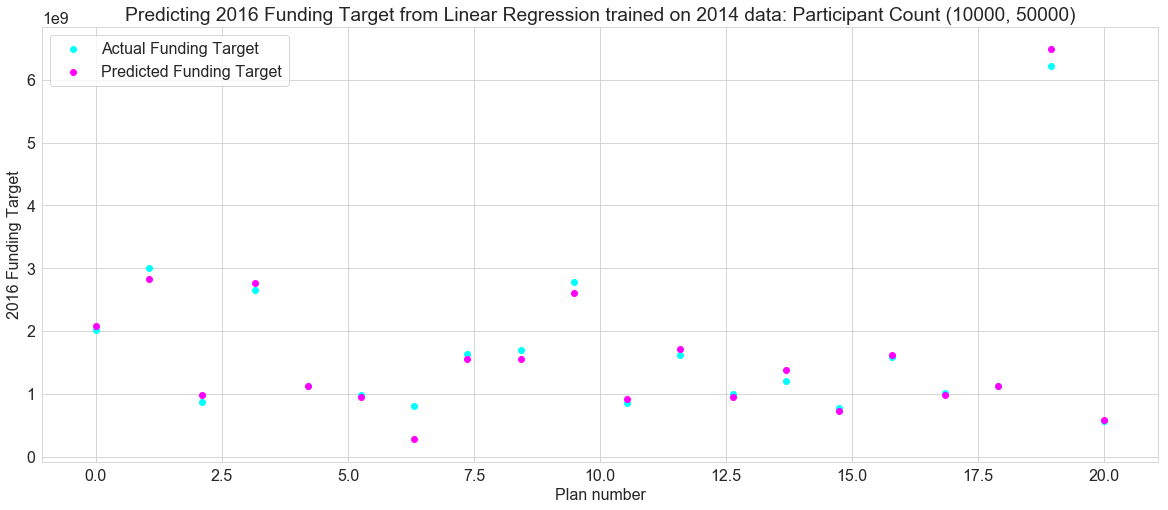

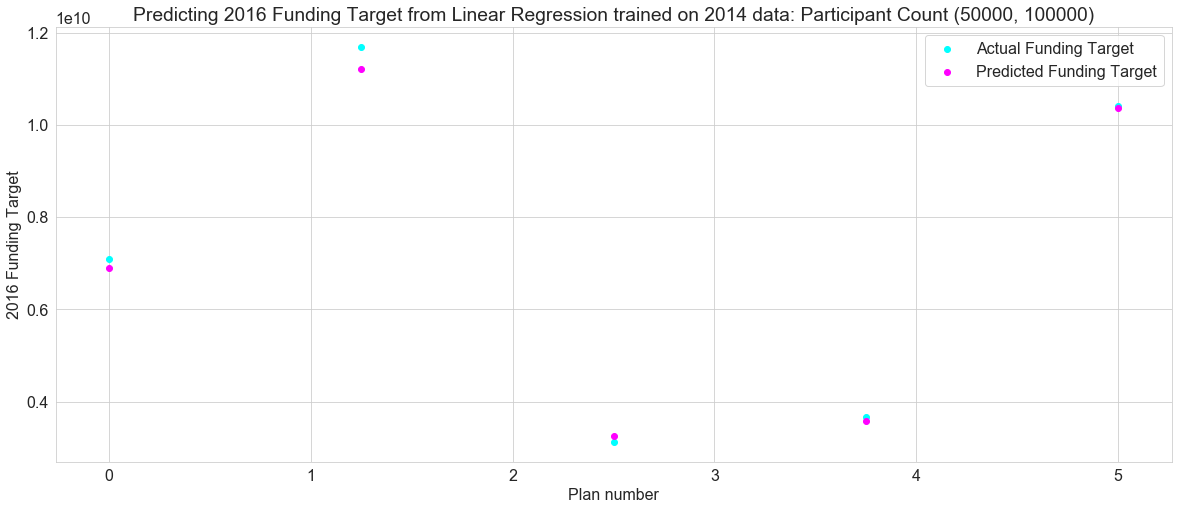

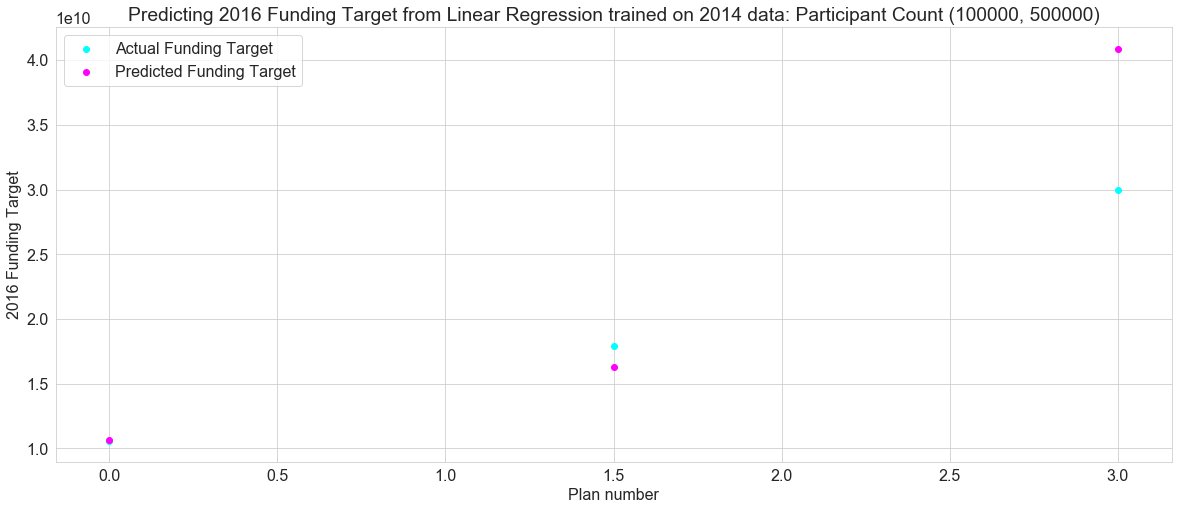

In [17]:
for i in partition_list[1:]:
    y_true = partitioned_dict_of_df_16[i][1]
    y_pred = predict_dict_16[i]
    plot_results(y_true, y_pred, i, 2016)

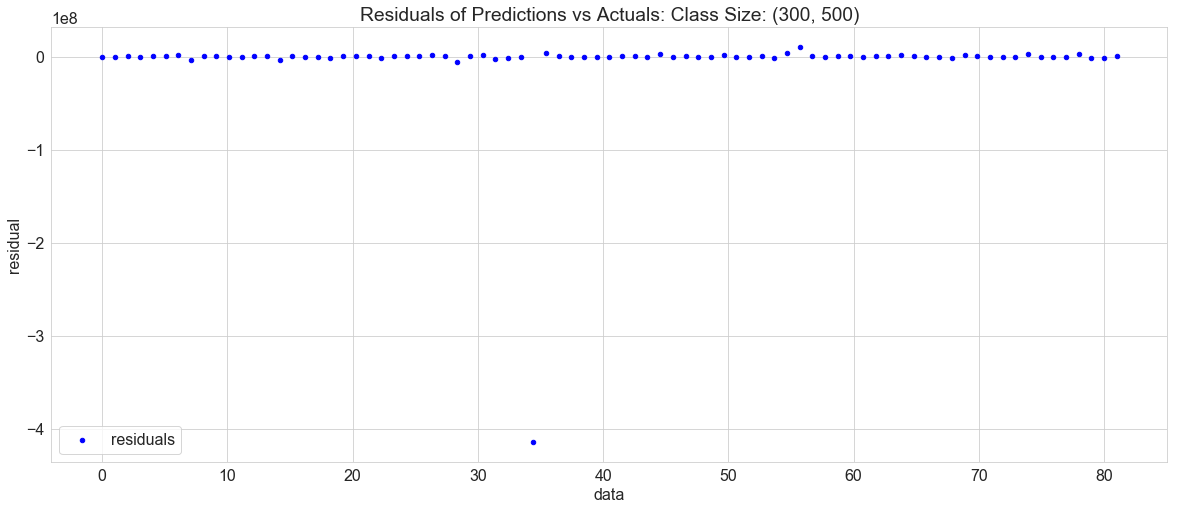

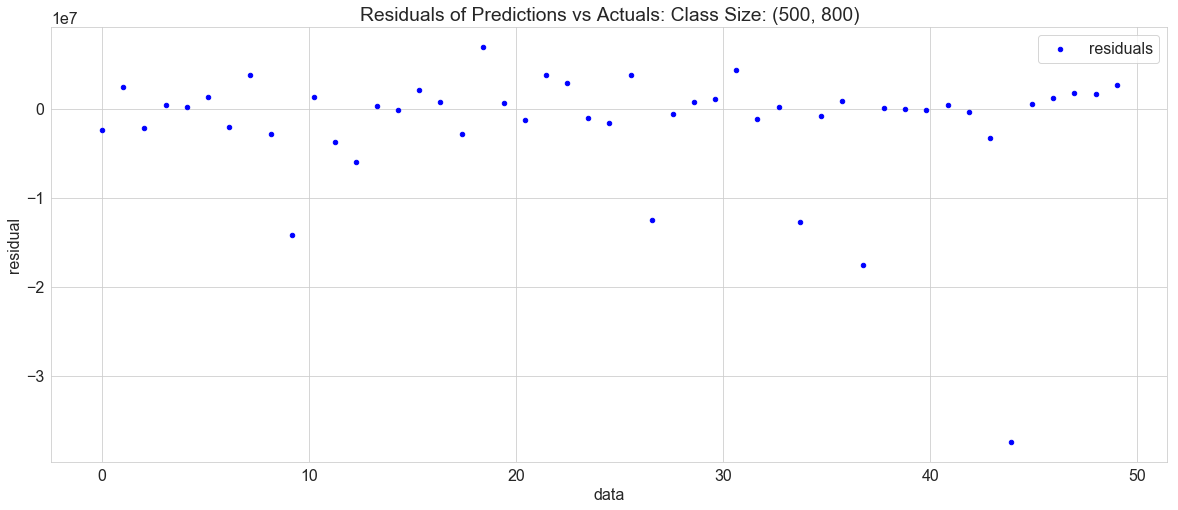

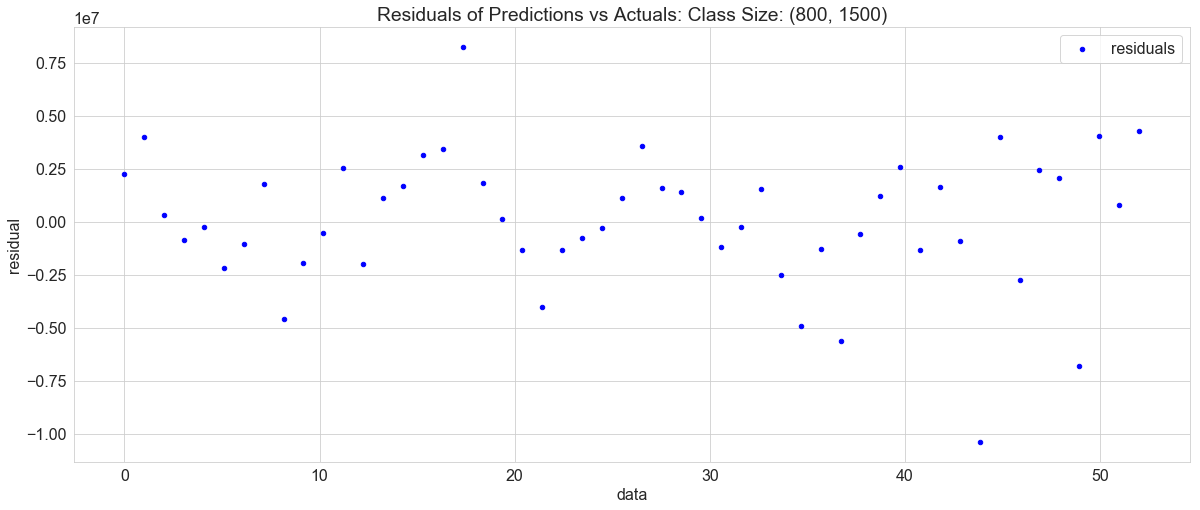

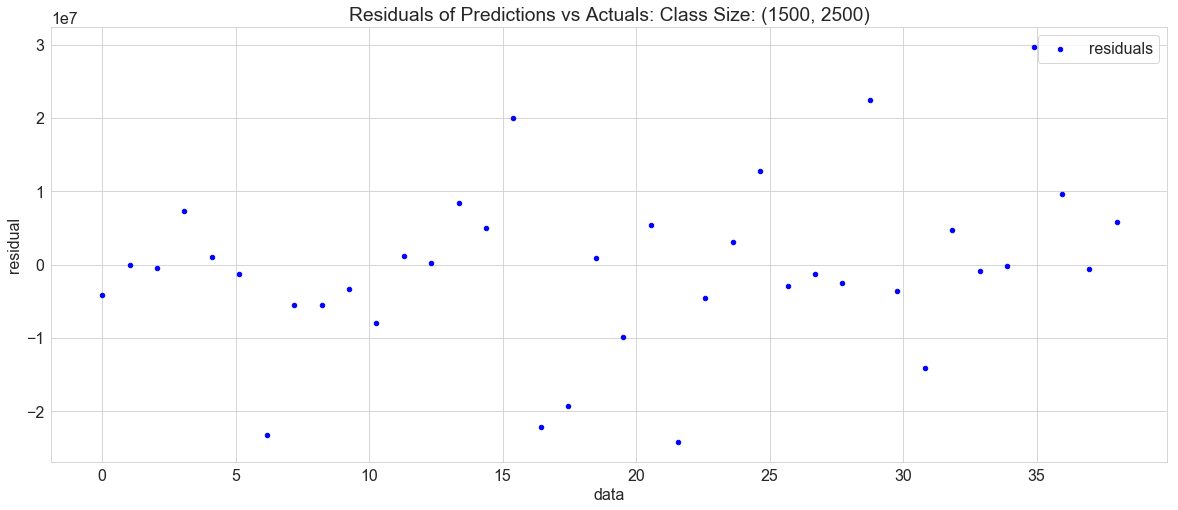

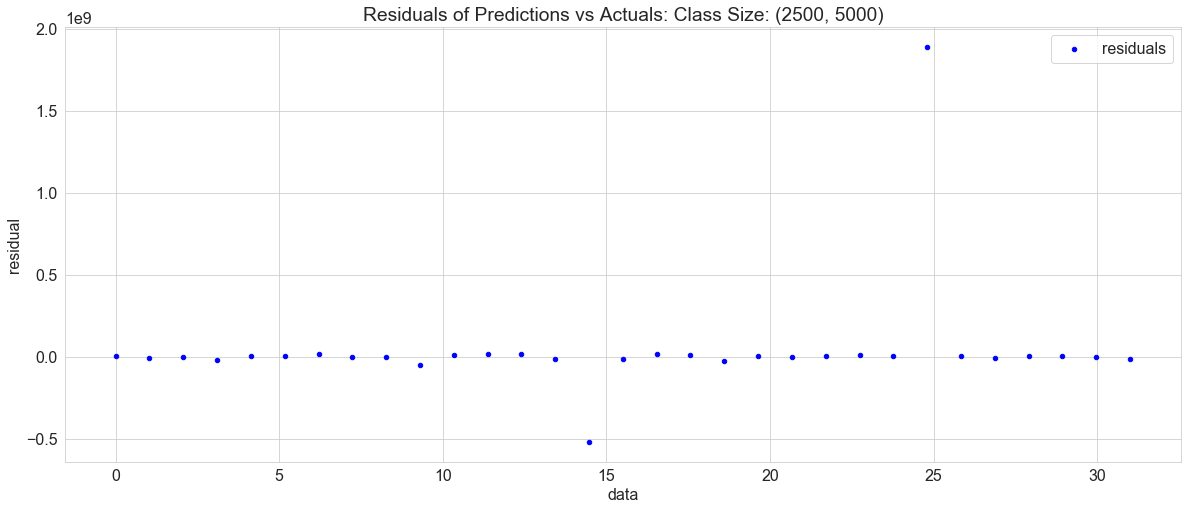

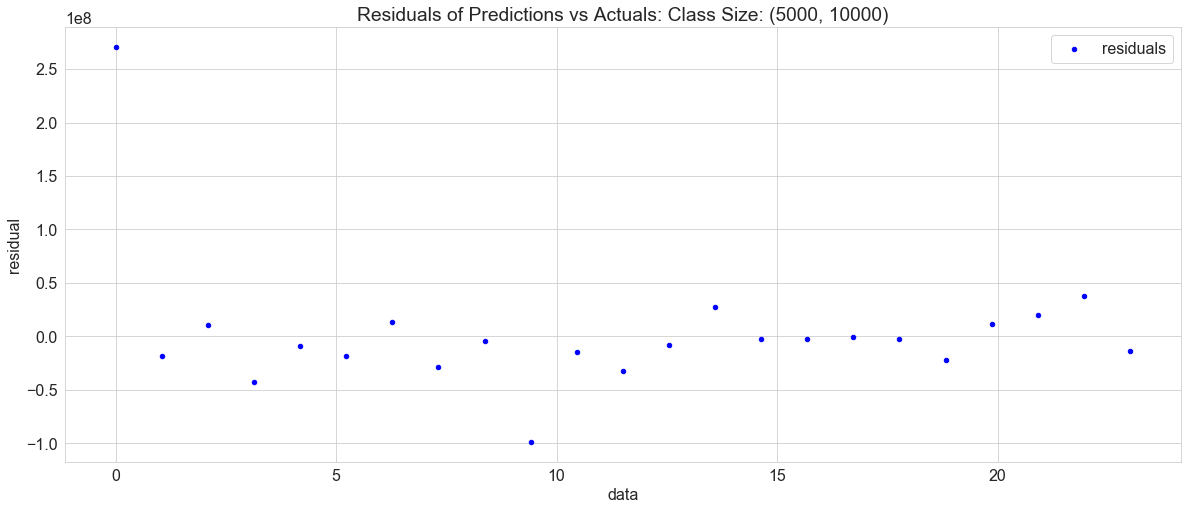

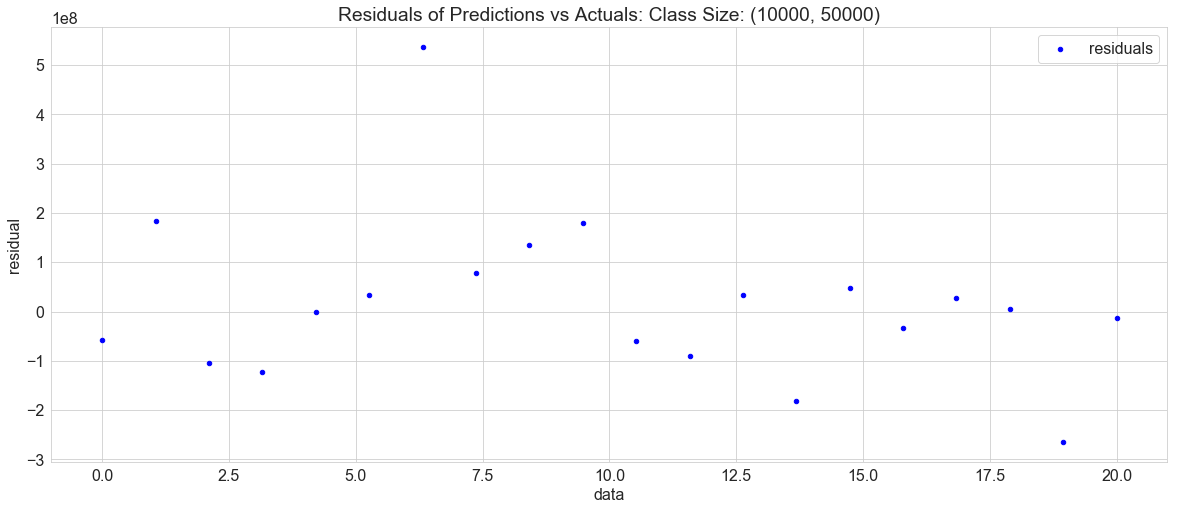

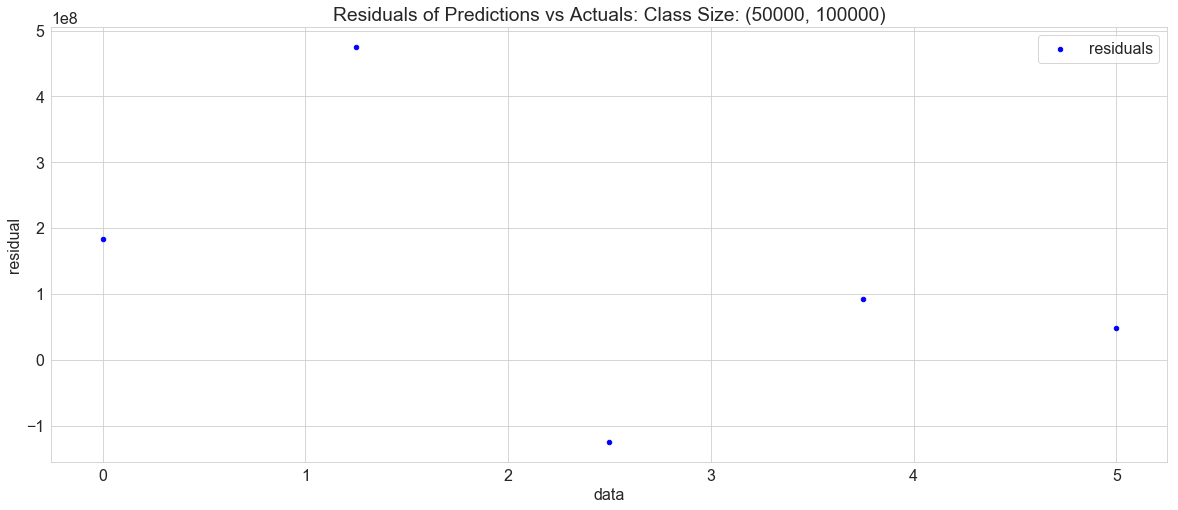

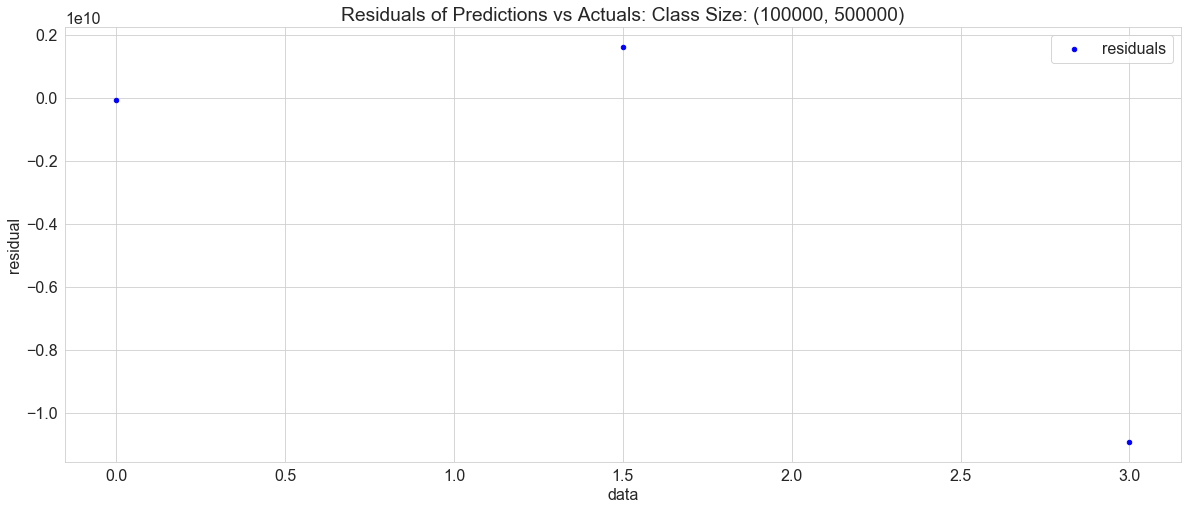

In [18]:
for i in partition_list[1:]:
    y_true = partitioned_dict_of_df_16[i][1]
    y_pred = predict_dict_16[i]
    plot_residuals(y_true, y_pred, i)